<a href="https://colab.research.google.com/github/milindkesar/TS/blob/master/image_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from zipfile import ZipFile
file_name='image_dataset.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


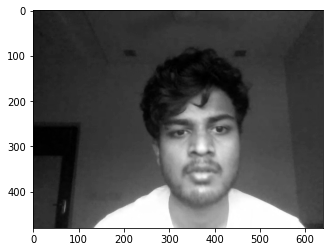

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
path="/content/image_dataset"
for img in os.listdir(path):
  img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
  plt.imshow(img_array,cmap="gray")
  plt.show()
  break

In [0]:
print(img_array.shape)

(480, 640)


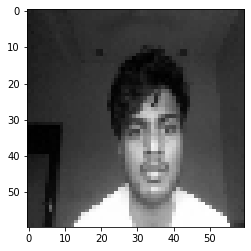

In [0]:
IMG_SIZE=60
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [0]:
data=[]
def create_data_array():
  for img in os.listdir(path):
    try:
      img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
      data.append([new_array])
    except Exception as e:
      pass
create_data_array()

In [0]:
print(len(data))

1017


In [0]:
data1=np.array(data)
data1=data1.astype("float32")
data1=data1/255.0

In [0]:
data1=data1.reshape(len(data1),-1)

In [0]:
print(data1.shape)

(1017, 3600)


In [0]:
from sklearn.cluster import MiniBatchKMeans
total_clusters=10
kmeans=MiniBatchKMeans(n_clusters=total_clusters)
kmeans.fit(data1)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [0]:
labels=kmeans.labels_

In [0]:
del zip
pairing=[]
final_array=[]
for (d_elem,label) in zip(data,labels):
  pairing.append(d_elem)
  pairing.append(label)
  final_array.append(pairing)
  pairing=[]


In [0]:
print(len(final_array))

1017


In [0]:
labels_list=[0,1,2,3,4,5,6,7,8,9]

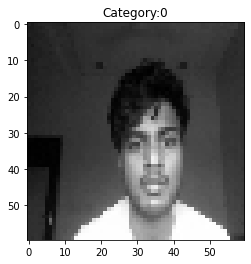

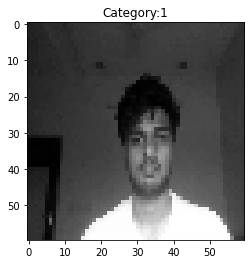

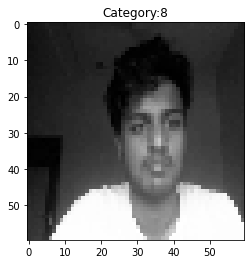

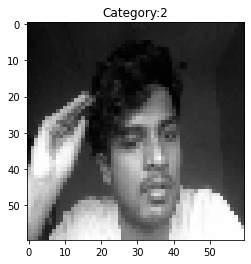

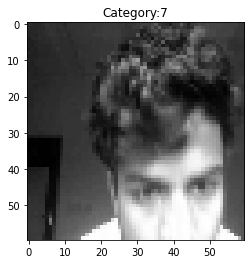

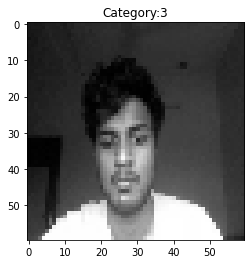

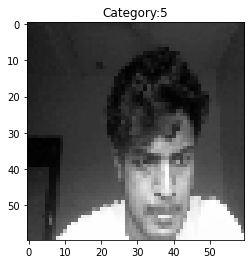

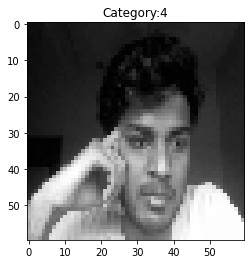

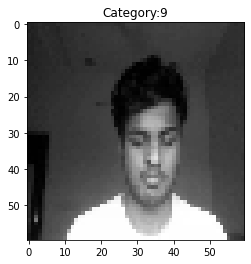

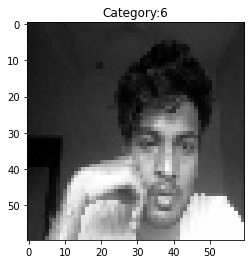

In [0]:
for elem in final_array:
  if (elem[1] in labels_list):
    labels_list.remove(elem[1])
    plt.imshow(elem[0][0],cmap='gray')
    plt.title('Category:'+str(elem[1]))
    plt.show()